In [19]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Topics
1. KNN classifier
2. K-Means clustering
3. PCA

In [20]:
df =  pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")


In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## KNN classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix  , classification_report

In [24]:
X = df.select_dtypes(include=['float'])
y = df.select_dtypes(include=['object'])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size= 0.2 , random_state= 42)

In [26]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [27]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

<Axes: >

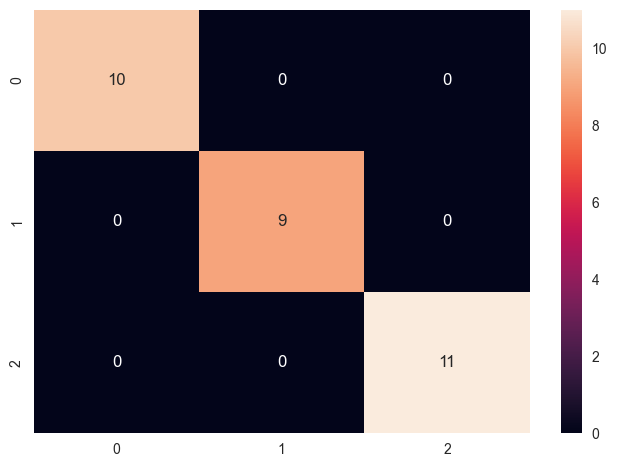

In [28]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

## K-Means clustering

In [29]:
X = df.iloc[:,:-1]

In [30]:
## for optimal cluster size
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [35]:
#Initiating model
model = KMeans()
visualizer = KElbowVisualizer(model,k=(2,6))

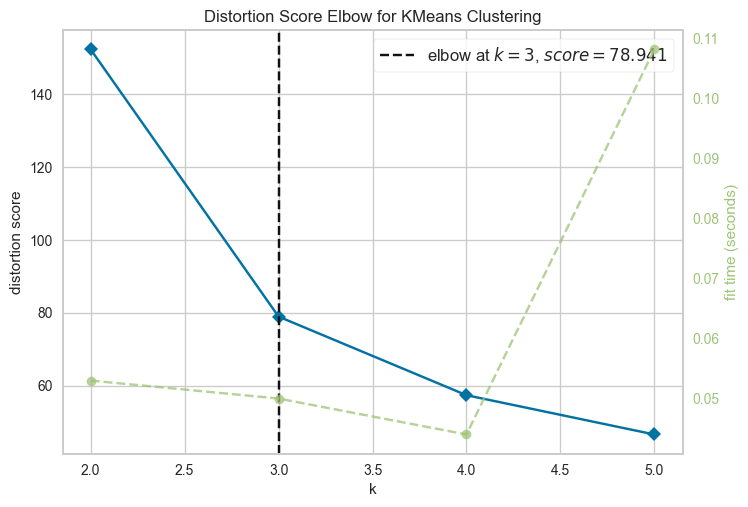

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
visualizer.fit(X)
visualizer.show()

In [64]:
model = KMeans(n_clusters=3 ,random_state=3)
y_pred = model.fit_predict(X)

Text(0.5, 1.0, 'Predicted labels')

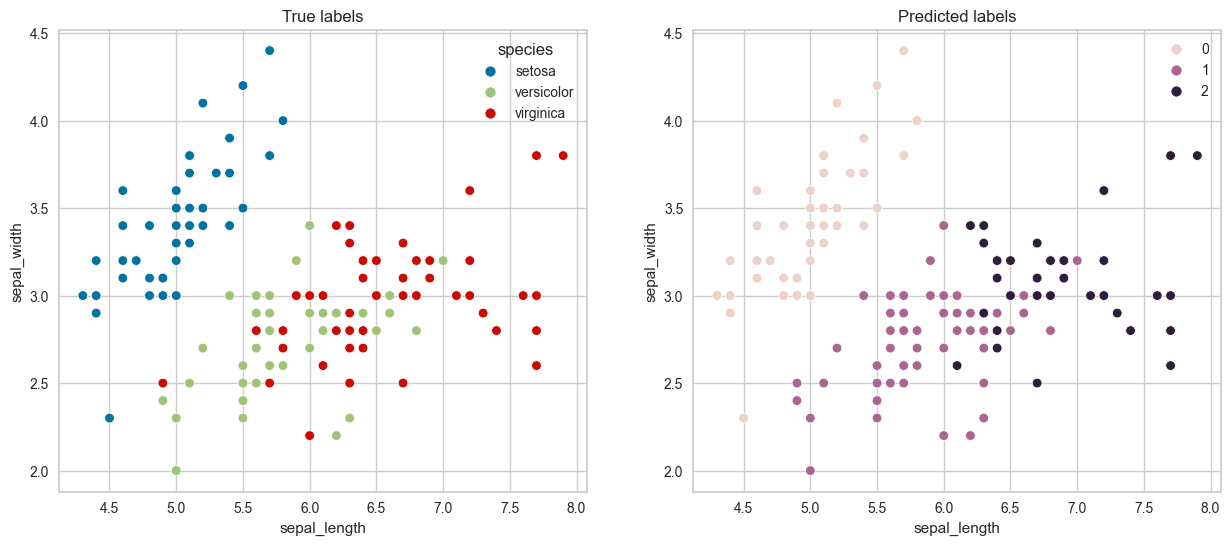

In [65]:
fig , ax = plt.subplots(nrows=1,ncols=2,squeeze=True,figsize=(15,6))
sns.scatterplot(x = X.iloc[:,0],y = X.iloc[:,1], hue=df['species'],ax=ax[0])
ax[0].set_title("True labels")
sns.scatterplot(x = X.iloc[:,0],y = X.iloc[:,1], hue=y_pred, ax=ax[1])
ax[1].set_title("Predicted labels")

## PCA
Dimensionality reduction

In [175]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler

In [206]:
X,y = make_classification(n_samples=5000, n_features=10,n_informative=3, n_classes=3,random_state=3,n_redundant=2)

In [207]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,2.182963,2.350829,-0.136987,-0.929929,0.352795,1.294281,2.086716,-0.184107,-0.241293,-0.778749
1,0.603412,0.056094,0.309981,0.838466,-0.730064,-0.370285,1.292606,-0.432787,0.560546,1.051231
2,0.915231,0.760326,-2.069415,-1.622078,0.241246,-0.206658,1.110735,1.444194,0.766160,-0.955943
3,-0.574008,0.741882,-0.942115,0.396295,0.464113,-1.124213,-2.130638,-0.092348,0.233293,-0.903755
4,-0.050546,2.411516,1.967325,-1.073918,-1.419703,-0.685825,-2.946357,0.010786,-0.135765,-2.915156
...,...,...,...,...,...,...,...,...,...,...
4995,1.998642,3.030967,0.271991,1.203092,0.600340,1.494606,0.930975,1.769208,0.822931,-0.111285
4996,-0.391359,0.343799,-0.528787,1.723552,1.338114,0.574983,-1.232296,-1.034819,-0.214180,0.507031
4997,0.560428,0.639521,-0.083955,-1.255343,0.380010,0.097056,0.471705,-0.205228,-0.997492,-0.916755
4998,-1.433278,-1.293369,-0.874670,-0.611384,-0.165006,0.414637,-1.688138,-0.168637,-1.958030,-0.534469


In [208]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3, random_state=2)

In [209]:
#scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [210]:
from sklearn.decomposition import PCA

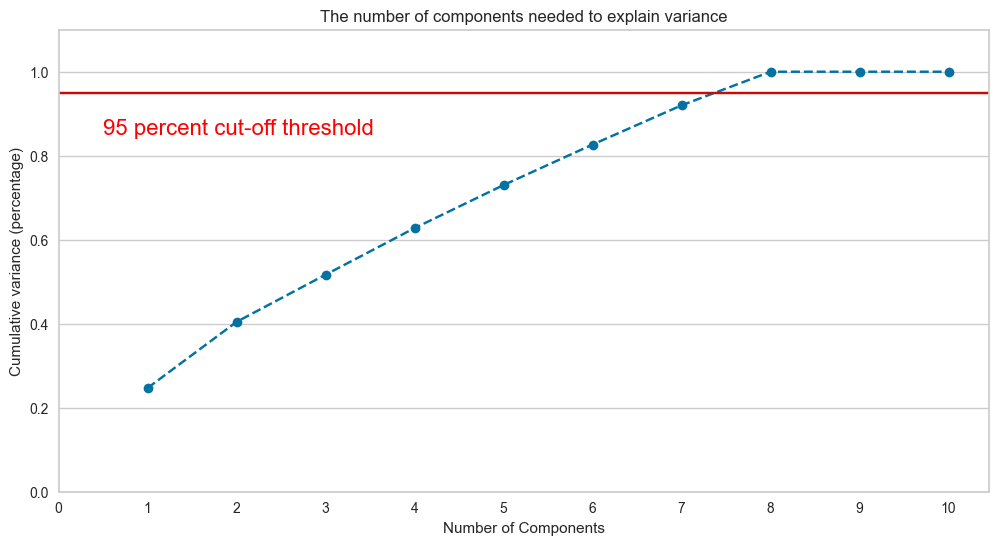

In [211]:
pca = PCA().fit(X_train)

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 11, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (percentage)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, "95 percent cut-off threshold", color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [212]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [213]:
pd.DataFrame(X_train_pca)

,0,1,2,3,4,5,6,7
0,0.252124,0.085106,-0.009496,0.054546,-0.112524,0.054695,-0.188381,-0.054962
1,0.080199,0.000943,-0.129516,0.190011,-0.208686,0.055980,-0.107577,-0.163241
2,-0.123676,0.200862,-0.204089,0.374232,0.048065,0.102829,0.035429,0.022462
3,-0.251093,0.041070,0.058950,-0.204142,0.010019,0.108078,0.117198,0.075469
4,0.582387,-0.153353,0.124753,-0.101112,0.043591,0.056383,0.000219,-0.032805
...,...,...,...,...,...,...,...,...
3495,0.186021,-0.092227,0.025005,-0.039436,0.169706,-0.063719,0.045702,-0.032322
3496,-0.119920,-0.100928,-0.055670,-0.163559,0.101333,0.053309,-0.066666,0.029228
3497,0.066792,0.126032,-0.217100,0.042862,0.008192,-0.174997,0.257782,0.180181
3498,-0.235079,0.011799,-0.238575,0.019420,0.315232,0.166918,-0.015617,-0.064802


In [214]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.62      0.64       496
           1       0.84      0.86      0.85       493
           2       0.69      0.72      0.71       511

    accuracy                           0.74      1500
   macro avg       0.73      0.74      0.73      1500
weighted avg       0.73      0.74      0.73      1500



In [215]:
clf.fit(X_train_pca,y_train)
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.62      0.64       496
           1       0.84      0.86      0.85       493
           2       0.69      0.72      0.71       511

    accuracy                           0.74      1500
   macro avg       0.73      0.74      0.73      1500
weighted avg       0.73      0.74      0.73      1500

